# Lista 2

### Wprowadzenie

Chcemy wygenerować zmienną losową X z rozkładu o ciągłej dystrybuancie F.
Załóżmy, że umiemy generować zmienne losowe $U$ z rozkładu $U(0, 1)$. 

Algorytm:
1. Generuj $U$.
2. Wstaw $X = F^{-1}(U)$, gdzie $F^{-1}$ jest uogólnioną funkcją odwrotną. 

W przypadku rozkładu dyskretnego, $P(X =x_i) = p_i, \\ i=1,2,..., \sum_i p_i = 1$, postępujemy w następujący sposób:
1. Generuj $U$
2. Wyznacz $j \in \mathbb{N}$ takie, że $\sum_{i=1}^{j-n} p_i < U \leq \sum_{i=1}^j p_i$
3. Zwróć $X =x_i$.

Wszędzie tam, gdzie potrafimy wyliczyć jawne wzory na dystrybuantę odwrotną,
korzystamy z nich. W pozostałych przypadkach korzystamy z napisanej wcześniej
jako argumenty parametry rozkładu, zwraca jednoargumentową funkcję.
funkcji `finv` . Uwaga: być może trzeba będzie napisać funkcję, która, przyjmując parametry rozkładu, zwraca jednoargimentową funkcję.

In [14]:
def war_pr(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

In [15]:
def srednia(X):
    n = len(X)
    return sum(X)/n

## zadanie dodatkowe

Dla ustalonego $N$, przetestuj 3 wybrane generatory z powyższych zadań, wykonując
następujące podpunkty:
1. Histogram i gęstość teoretyczna (na jednym wykresie).
2. Dystrybuanta empiryczna i dystrybuanta teoretyczna (na jednym wykresie).
3. Wykres kwantylowy (QQ-plot).
4. Policz średnią i wariancję próbkową; porównaj je z wartościami teoretycznymi.
$$\text{------ dotąd mam zrobione ------}$$
5. Wykonaj wybrane testy zgodności.
6. Porównaj czas działania zaprogramowanych generatorów podczas generowania $10^6$ zmiennych losowych z generatorami wbudowanymi w Pythonie.

### zadanie 1
**Rozkłady ciągłe** \
Zaimplementuj generowanie metodą odwrotnej dystrybuanty
rozkładu wykładniczego Exp(λ), normalnego $\text{N}(µ, σ^2)$ oraz Cauchy’ego $\text{C}(µ, γ)$.


* rozkład wykładniczy

In [3]:
import numpy as np, matplotlib.pyplot as plt, math, random, seaborn as sns
from scipy.stats import norm, probplot, cauchy, geom, expon, poisson

In [4]:
def F_1exp(X, lambd = 3):
    return [-1/lambd*np.log(1-x) for x in X]

In [5]:
def F_exp(X, lambd = 3):
    return [1 - np.exp(-lambd*x) for x in X]

In [6]:
def f_exp(X, lambd = 3):
    return [lambd*np.exp(-lambd*x) for x in X]

In [7]:
n = 1000
lambd = 3
X0 = np.random.rand(n)
X = F_1exp(X0)

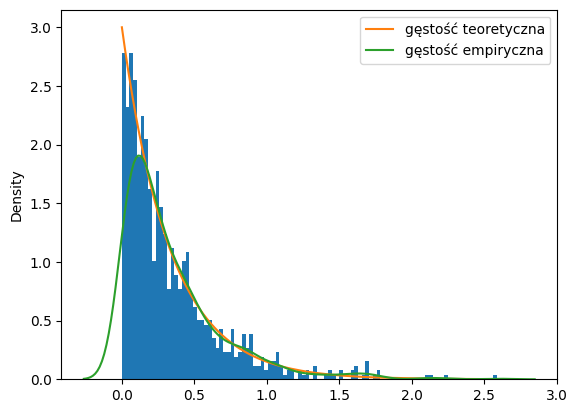

In [8]:
xs  = np.linspace(0,n,1000)
plt.hist(X,density=True, bins=100)
plt.plot(sorted(X), f_exp(sorted(X)), label = 'gęstość teoretyczna')
sns.kdeplot(X, label = 'gęstość empiryczna')
plt.legend()
plt.show()

In [9]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n


In [10]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = sorted(F_exp(X))
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

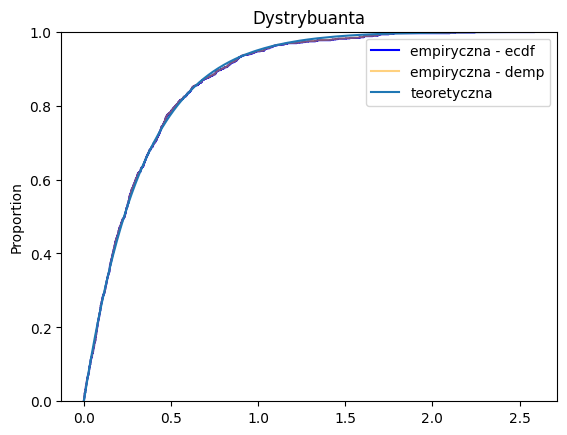

In [11]:
drewdemp(X)

((array([6.93147181e-04, 1.68330207e-03, 2.68512296e-03, 3.68794851e-03,
         4.69178072e-03, 5.69662163e-03, 6.70247325e-03, 7.70933763e-03,
         8.71721682e-03, 9.72611284e-03, 1.07360278e-02, 1.17469636e-02,
         1.27589226e-02, 1.37719066e-02, 1.47859178e-02, 1.58009582e-02,
         1.68170300e-02, 1.78341353e-02, 1.88522761e-02, 1.98714545e-02,
         2.08916728e-02, 2.19129330e-02, 2.29352372e-02, 2.39585876e-02,
         2.49829863e-02, 2.60084354e-02, 2.70349372e-02, 2.80624938e-02,
         2.90911074e-02, 3.01207801e-02, 3.11515141e-02, 3.21833116e-02,
         3.32161748e-02, 3.42501059e-02, 3.52851071e-02, 3.63211807e-02,
         3.73583289e-02, 3.83965538e-02, 3.94358578e-02, 4.04762430e-02,
         4.15177118e-02, 4.25602664e-02, 4.36039090e-02, 4.46486419e-02,
         4.56944675e-02, 4.67413879e-02, 4.77894056e-02, 4.88385227e-02,
         4.98887416e-02, 5.09400647e-02, 5.19924942e-02, 5.30460325e-02,
         5.41006818e-02, 5.51564447e-02, 5.62133233

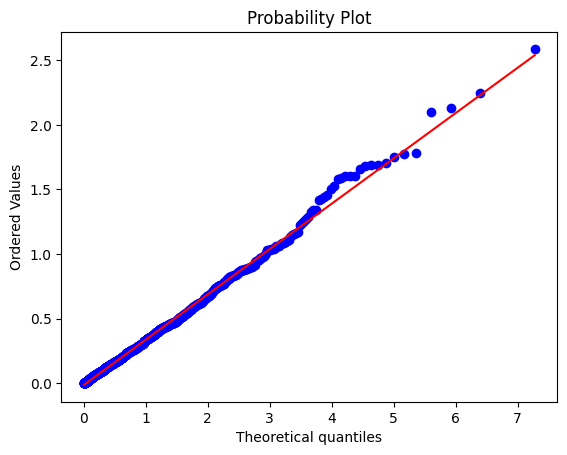

In [12]:
probplot(X, dist = 'expon', plot=plt)

In [16]:

print('średnia teoretyczna: ', 1/lambd, '\nśrednia próbkowa: ', srednia(X), '\nwariancja teoretyczna: ',1/lambd**2, '\nwariancja próbkowa ',war_pr(X))

średnia teoretyczna:  0.3333333333333333 
średnia próbkowa:  0.3378226665290138 
wariancja teoretyczna:  0.1111111111111111 
wariancja próbkowa  0.12145190365622323


* rozkład normalny

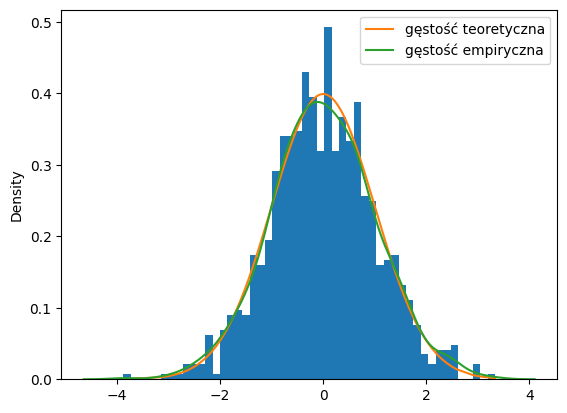

In [17]:
mi = 0
sigma = 1
X1 = norm.ppf(X0, loc = mi, scale = sigma**0.5)
plt.hist(X1, density = True, bins = 50)
plt.plot(sorted(X1), norm.pdf(sorted(X1), loc = mi, scale = sigma), label = 'gęstość teoretyczna')
sns.kdeplot(X1, label = 'gęstość empiryczna')
plt.legend()
plt.show()


In [18]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = norm.cdf(x_values, loc = mi, scale = sigma)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

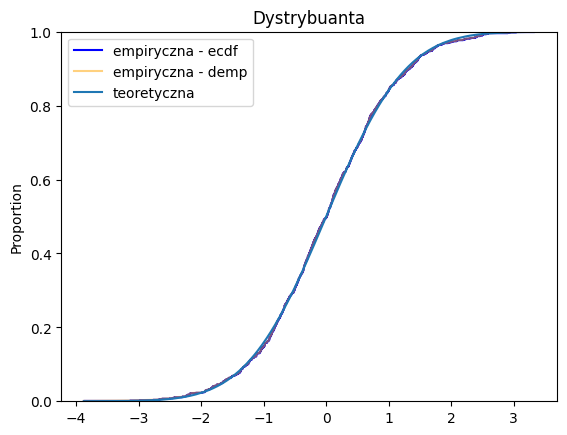

In [19]:
drewdemp(X1)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

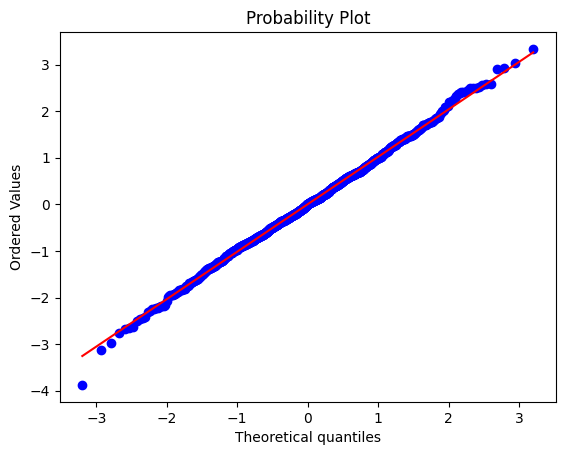

In [20]:
probplot(X1, dist = 'norm', plot=plt)

In [21]:
print('średnia teoretyczna: ', mi, '\nśrednia próbkowa: ', srednia(X1), '\nwariancja teoretyczna: ',sigma, '\nwariancja próbkowa ',war_pr(X1))

średnia teoretyczna:  0 
średnia próbkowa:  0.0033732859546083556 
wariancja teoretyczna:  1 
wariancja próbkowa  1.0351391680197883


* rozkład Cauchy'ego

In [121]:
def F_c(X, x0 = 0, gamma =1):
    return [1/np.pi * np.arctan((u - x0)/gamma) + 1/2 for u in X]

In [124]:
def F_1c(X, x0 = 0, gamma = 1):
    return [x0 + gamma*np.tan(np.pi*(u - 0.5)) for u in X]

In [24]:
def f_c(X, x0, gamma):
    return [1/(np.pi * gamma * (1 + ((u +x0)/gamma)**2)) for u in X]

In [25]:
x0 = 0
gamma = 1
X2 = F_1c(X0, x0, gamma)

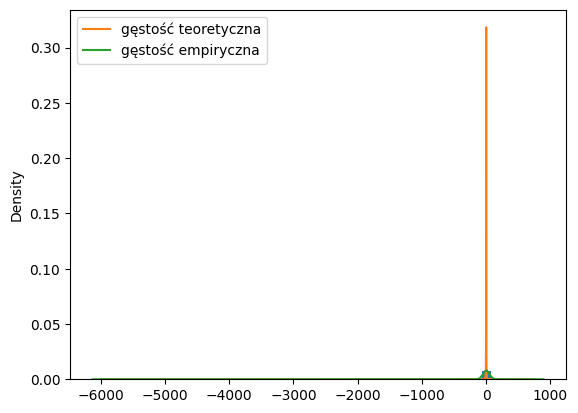

In [26]:
plt.hist(X2, density = True, bins = 50)
plt.plot(sorted(X2), f_c(sorted(X2),x0, gamma), label = 'gęstość teoretyczna')
sns.kdeplot(X2, label = 'gęstość empiryczna')
plt.legend()
plt.show()

In [27]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = sorted(F_c(X, x0, gamma))
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.xlim(-5,5)
    plt.title('Dystrybuanta')
    plt.show()

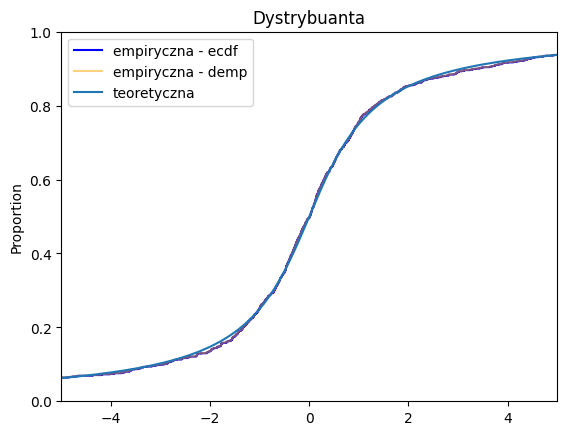

In [28]:
drewdemp(X2)

((array([-4.59382542e+02, -1.89255932e+02, -1.18702157e+02, -8.64662250e+01,
         -6.79985300e+01, -5.60303152e+01, -4.76437443e+01, -4.14401930e+01,
         -3.66653787e+01, -3.28766252e+01, -2.97970140e+01, -2.72444414e+01,
         -2.50942382e+01, -2.32581816e+01, -2.16720837e+01, -2.02881284e+01,
         -1.90699644e+01, -1.79894638e+01, -1.70245208e+01, -1.61575221e+01,
         -1.53742609e+01, -1.46631512e+01, -1.40146503e+01, -1.34208270e+01,
         -1.28750356e+01, -1.23716655e+01, -1.19059471e+01, -1.14738000e+01,
         -1.10717128e+01, -1.06966474e+01, -1.03459617e+01, -1.00173472e+01,
         -9.70877784e+00, -9.41846831e+00, -9.14483914e+00, -8.88648789e+00,
         -8.64216508e+00, -8.41075386e+00, -8.19125286e+00, -7.98276164e+00,
         -7.78446832e+00, -7.59563891e+00, -7.41560820e+00, -7.24377191e+00,
         -7.07957985e+00, -6.92252999e+00, -6.77216334e+00, -6.62805940e+00,
         -6.48983222e+00, -6.35712692e+00, -6.22961664e+00, -6.10699981e+00,

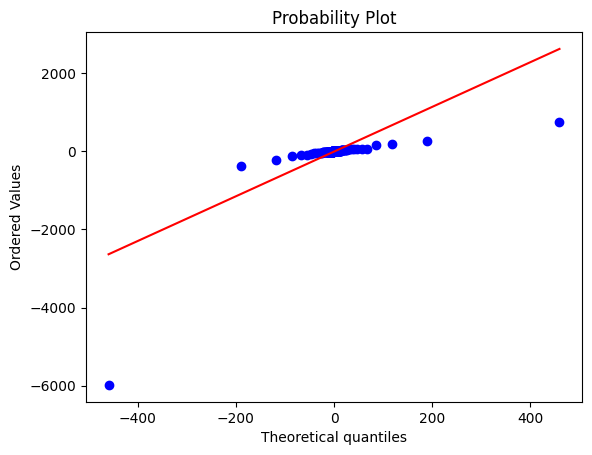

In [29]:
probplot(X2, dist = 'cauchy', plot=plt)

In [30]:
# średnia i wariancja teoretyczne są nieokreślone

print('średnia próbkowa: ', srednia(X2),'\nwariancja próbkowa ',war_pr(X2))

średnia próbkowa:  -5.168896166960771 
wariancja próbkowa  36757.677189690534


### zadanie 2

**Rozkłady dyskretne** $\\$
Zaimplementuj generowanie metodą odwrotnej dystrybuanty rozkładu geometrycznego Geo($p$) oraz Poissona Poiss(λ).

* rozkład geometryczny

In [31]:
from scipy.stats import geom

In [32]:
def F_1geo(X,p):
    return np.ceil(np.log(X)/np.log(1-p))

In [33]:
def f_geo(X,p):
    return [(1-p)**(k-1)*p for k in X]

In [34]:
p = 0.5
X3 = F_1geo(X0,p)
xs = np.linspace(0,10,n)

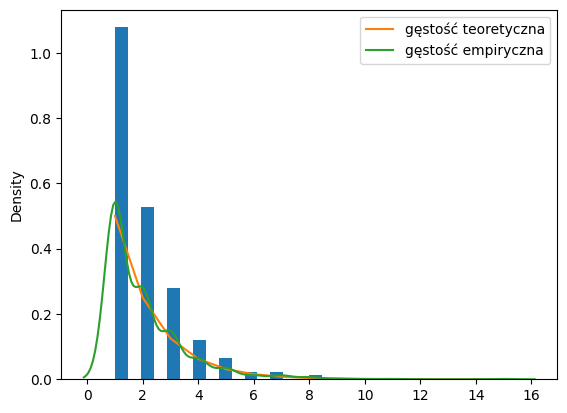

In [35]:
plt.hist(X3, density = True, bins = 30)
plt.plot(sorted(X3), f_geo(sorted(X3),p), label = 'gęstość teoretyczna')
sns.kdeplot(X3, label = 'gęstość empiryczna')
plt.legend()
plt.show()

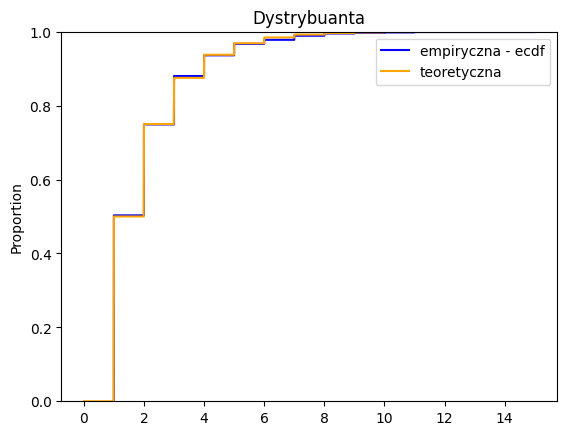

In [36]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = xs
    # y_values = [demp(x_values, x) for x in x_values]
    z_values = geom.cdf(x_values, p)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    # plt.plot(x_values, y_values, label='empiryczna - demp', color = 'red', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna', color = 'orange')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

drewdemp(X3)

((array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,

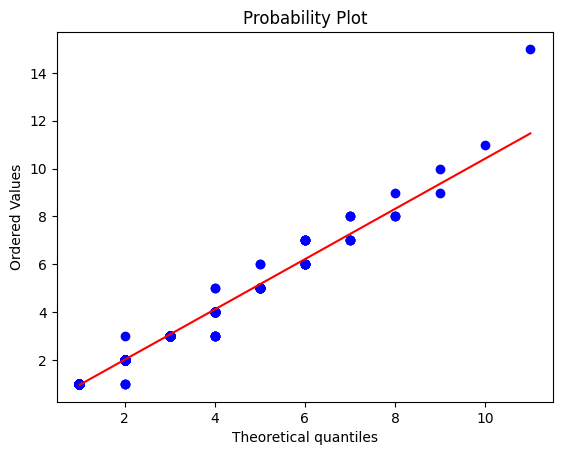

In [37]:
probplot(X3, dist = 'geom',sparams =(p,), plot=plt)

In [38]:
print('średnia teoretyczna: ', 1/p, '\nśrednia próbkowa: ', srednia(X3), '\nwariancja teoretyczna: ',(1-p)/p**2, '\nwariancja próbkowa ',war_pr(X3))

średnia teoretyczna:  2.0 
średnia próbkowa:  2.012 
wariancja teoretyczna:  2.0 
wariancja próbkowa  2.2180740740740745


* rozkład Poissona

In [39]:
from scipy.stats import poisson

In [40]:
def F_1poisson(lam):
    U = random.random()
    j=0
    p = np.exp(-lam)
    F = p
    while U>F:
        p = p*lam/(j+1)
        F += p
        j += 1 
    return j

In [41]:
lam = 3
print(F_1poisson(4))

5


In [42]:
X4 = [F_1poisson(lam) for _ in range(n)]

In [43]:
def f_geo(X,p):
    return [(1-p)**(k-1)*p for k in X]

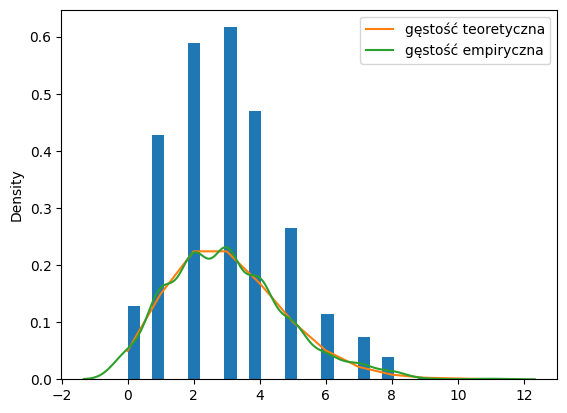

In [44]:
plt.hist(X4, density = True, bins = 30)
plt.plot(sorted(X4), [poisson.pmf(x, lam) for x in sorted(X4)], label = 'gęstość teoretyczna')
sns.kdeplot(X4, label = 'gęstość empiryczna')
plt.legend()
plt.show()

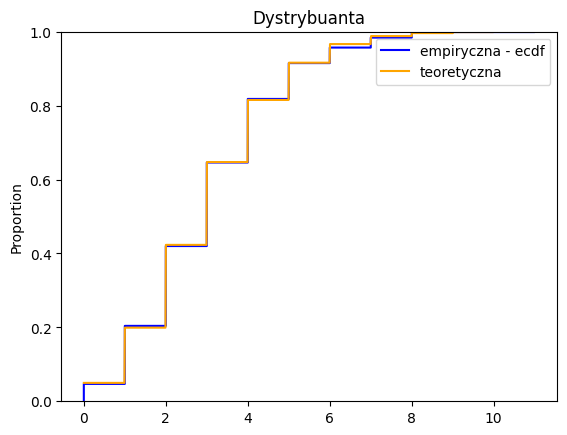

In [45]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    x_values = xs
    # y_values = [demp(x_values, x) for x in x_values]
    z_values = poisson.cdf(x_values, lam)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    # plt.plot(x_values, y_values, label='empiryczna - demp', color = 'red', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna', color = 'orange')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

drewdemp(X4)

((array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,

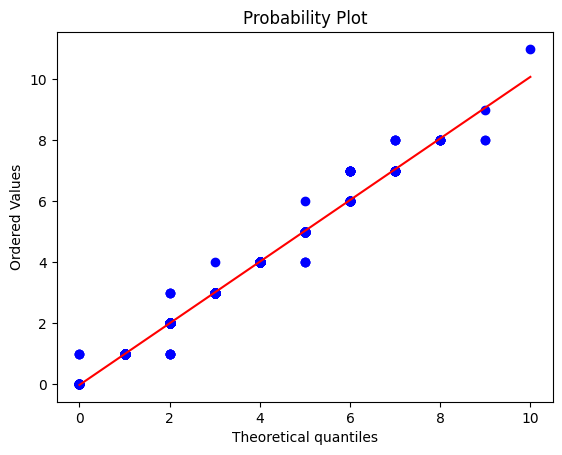

In [47]:
probplot(X4, dist = 'poisson',sparams =(lam,), plot=plt)

In [48]:
print('średnia teoretyczna: ', lam, '\nśrednia próbkowa: ', srednia(X4), '\nwariancja teoretyczna: ',lam, '\nwariancja próbkowa ',war_pr(X4))

średnia teoretyczna:  3 
średnia próbkowa:  3.013 
wariancja teoretyczna:  3 
wariancja próbkowa  3.0899209209209317


# ♥☺☻♦♣♠•◘○

## zadanie uzupełniające

Napisz funkcję, która pobiera dystrybuantę $F$ (jako funkcję), parametr $u$ i zwraca
$F^{−1}(u)$ z wybraną dokładnością $∆x$. W uproszczonej wersji, możesz założyć, że $F$
jest ciągła.
Następnie porównaj wynik z teoretyczną $F^{−1}$ dla rozkładu wykładniczego (wystarczy np. kilka punktów lub wykres), oraz używając tej metody wygeneruj próbę
z rozkładu normalnego.
Obliczanie $F^{−1}$ można przeprowadzić na różne sposoby. Można szukać zera $F(x)−u = 0$, można też skorzystać z $F^{−1}(u) = \text{inf}\{x : F(x) − u\} = \text{sup}\{x : F(x) \neq u\}$
(ta druga równość tylko dla ciągłej F). Można więc zacząć od wybranego $x$, np. $x = 0$ po czym w pętli `while` zmniejszać go lub zwiększać dopóki nie przebije poziomu $F(x) = u$. Dystrybuantę rozkładu normalnego $N(0, 1)$ możesz zapisać używając
funkcji `erf`.

In [49]:
def exp_(x, lambd = 3):
    return 1 - np.exp(-lambd*x)

In [50]:
def F_1(F, u):
    deltax = 0.01
    x=0
    if F(x) == u:
        return x
    else:
        if F(x)<u:
            while F(x)<u:
                x+=deltax
                if F(x)>=u:
                    return x
        else:
            while F(x)>u:
                x-=deltax
                if F(x)<=u:
                    return x
    return x


In [51]:
print(F_1(exp_, 0.10))

0.04


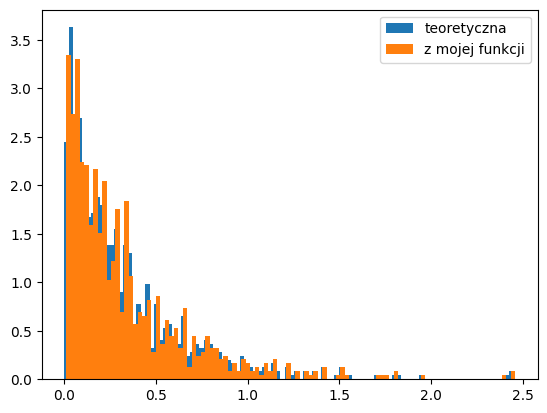

In [85]:
X0 = np.random.rand(1000)
X = F_1exp(X0)
Y = [F_1(exp_, i) for i in X0]
xs  = np.linspace(0,3,1000)
plt.hist(X,density=True, bins=100, label = 'teoretyczna')
plt.hist(Y,density=True, bins=100, label = 'z mojej funkcji')
plt.legend()
plt.show()

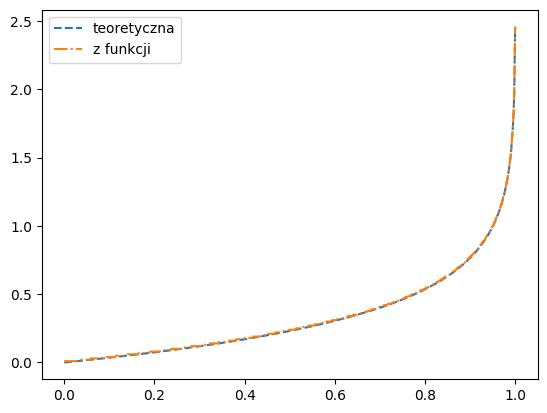

In [87]:
X = F_1exp(sorted(X0))
Y = [F_1(exp_, i) for i in sorted(X0)]
plt.plot(sorted(X0),X,'--', label='teoretyczna' )
plt.plot(sorted(X0),Y,'-.', label = 'z funkcji' )
plt.legend()
plt.show()

In [84]:
import math, random
from scipy.special import erfinv, erf
from scipy.stats import norm

# def norm_1(u,mu=0, sigma=1):
#     u = random.random()
#     x = mu + sigma * math.sqrt(2) * erf(2 * u - 1)
#     return x


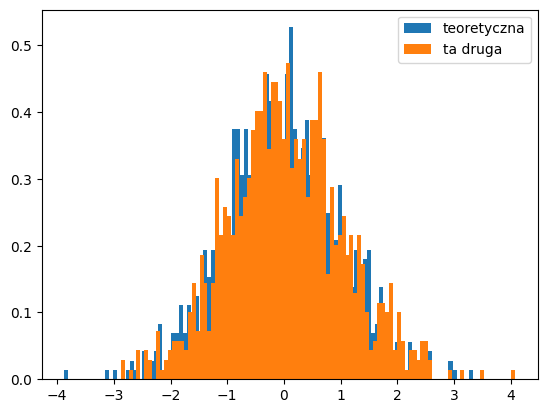

In [73]:
X0 = np.random.rand(1000)
Y1 = [F_1(norm.cdf, i) for i in X0]
xs  = np.linspace(0,3,1000)
plt.hist(X1,density=True, bins=100, label = 'teoretyczna')
plt.hist(Y1,density=True, bins=100, label = 'ta druga')
plt.legend()
# plt.ylim(0,2)
# plt.show()
# print(len(Y1))

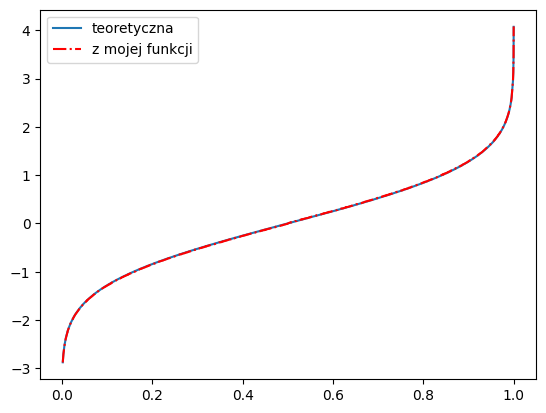

In [83]:
X_ = -1*norm.isf(sorted(X0))
Y_ = [F_1(norm.cdf, i) for i in sorted(X0)]
plt.plot(sorted(X0),X_, label = 'teoretyczna')
plt.plot(sorted(X0),Y_, 'r-.', label = 'z mojej funkcji')
plt.legend()
plt.show()

## zadanie dodatkowe 2

Napisz funkcję `drawqq(X,distr)`, która jako argumenty przyjmuje próbę losową $X$
(lista) oraz jednoargumentową funkcję `distr` o wartościach w [0, 1] (która reprezentuje dystrybuantę teoretyczną $F$). Funkcja powinna rysować wykres kwantylowy,
czyli tzw. QQ-plot. Sposób wykonania wykresu:

1. Posortuj $X$; posortowaną $X$ będziemy oznaczać przez $X$.
2. Niech $N$ będzie rozmiarem $X$.
3. Utwórz wektor $Q$ długości $N$.
4. Dla każdego $i$ od 1 do $N$ policz kwantyl teoretyczny $$q = F^{-1}(\frac{i}{N});\ Q[i] = q.$$
5. Na wykresie umieść punkty $(q; x)$, gdzie $x \in X, q ∈ Q$.
6. Na wykresie nanieś dodatkowo linię $y = x$.

In [129]:
def drawqq(X, distr):
    X = sorted(X)
    N = len(X)
    Q = [0]*N
    for i in range(N):
        Q[i] = F_1(distr, i/N)
    plt.scatter(Q,X)
    plt.plot(Q,Q)

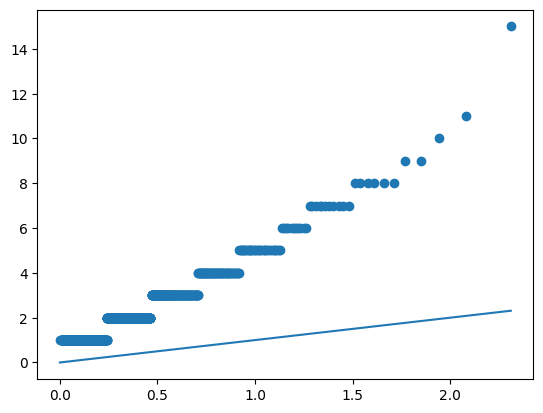

In [130]:
drawqq(X3, exp_)
